In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("weatherAUS.csv")

In [10]:
data.shape

(248577, 24)

In [11]:
data.keys

<bound method NDFrame.keys of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
248572  2024-06-25    Uluru      2.6     19.8       0.0          NaN   
248573  2024-06-26    Uluru      2.3     22.1       0.0          NaN   
248574  2024-06-27    Uluru      3.7     24.2       0.0          NaN   
248575  2024-06-28    Uluru      6.0     27.5       0.0          NaN   
248576  2024-06-29    Uluru     12.7     15.9       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W  

In [12]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [15]:
#checking for missing values

data.isna().sum()

Date                  0
Location              0
MinTemp            4376
MaxTemp            4286
Rainfall           7599
Evaporation      139706
Sunshine         149737
WindGustDir       18389
WindGustSpeed     18233
WindDir9am        19490
WindDir3pm        10862
WindSpeed9am       5053
WindSpeed3pm       9243
Humidity9am        5851
Humidity3pm       10533
Pressure9am       27432
Pressure3pm       27410
Cloud9am         111347
Cloud3pm         117296
Temp9am            4399
Temp3pm            9185
RainToday          7599
RISK_MM            7598
RainTomorrow       7598
dtype: int64

In [16]:
#lets delete columns that has 50 percent missing values

#calculate the percentage for missing values
missing_percentage=data.isna().mean()*100

#identify the columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage>50].index

#drop these columns
df_cleaned=data.drop(columns=columns_to_drop)

#display the remaining columns
print(df_cleaned)

              Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0       2008-12-01   Albury     13.4     22.9       0.6           W   
1       2008-12-02   Albury      7.4     25.1       0.0         WNW   
2       2008-12-03   Albury     12.9     25.7       0.0         WSW   
3       2008-12-04   Albury      9.2     28.0       0.0          NE   
4       2008-12-05   Albury     17.5     32.3       1.0           W   
...            ...      ...      ...      ...       ...         ...   
248572  2024-06-25    Uluru      2.6     19.8       0.0          NW   
248573  2024-06-26    Uluru      2.3     22.1       0.0         WNW   
248574  2024-06-27    Uluru      3.7     24.2       0.0         NNW   
248575  2024-06-28    Uluru      6.0     27.5       0.0         NNW   
248576  2024-06-29    Uluru     12.7     15.9       0.0           S   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0                44.0          W        WNW          20.0  ...      

In [17]:
df_cleaned.shape

(248577, 22)

In [19]:
df_cleaned.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [23]:
# Select only the numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

In [24]:
# Fill missing values in numeric columns with the mean
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].mean())

In [26]:
df_cleaned.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      18389
WindGustSpeed        0
WindDir9am       19490
WindDir3pm       10862
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         7599
RISK_MM              0
RainTomorrow      7598
dtype: int64

In [27]:
# For non-numeric columns, you can fill missing values with mode or other strategies
# Example: Filling missing values in categorical columns with the mode
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns
df_cleaned[non_numeric_cols] = df_cleaned[non_numeric_cols].fillna(df_cleaned[non_numeric_cols].mode().iloc[0])


In [28]:
df_cleaned.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [29]:
# Identify categorical variables
categorical_vars = [var for var in data.columns if data[var].dtype == 'O']

# Identify continuous variables
continuous_vars = [var for var in data.columns if pd.api.types.is_numeric_dtype(data[var])]

print('Categorical Variables:', categorical_vars)
print('Continuous Variables:', continuous_vars)

Categorical Variables: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Continuous Variables: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


In [30]:
#explore the categorical and continuous variables

import seaborn as sns

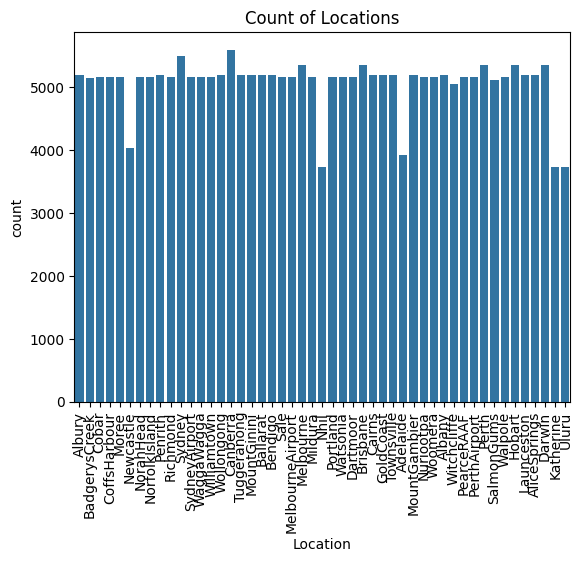

In [35]:
# Example: Count plot for the 'Location' variable
sns.countplot(data=data, x='Location')
plt.title('Count of Locations')
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()

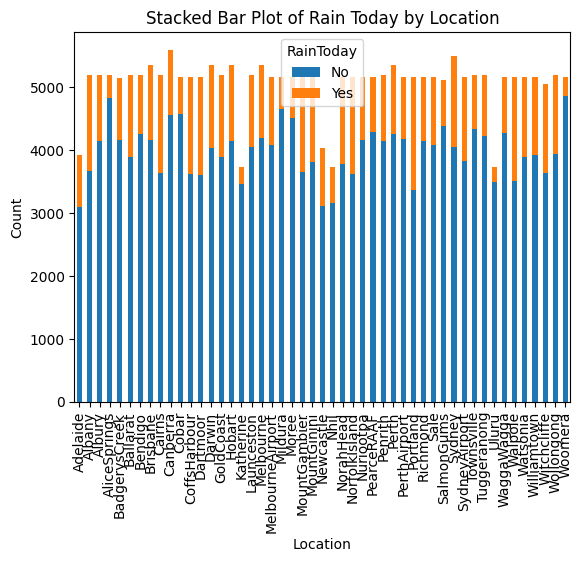

In [37]:
# Stacked Bar Plot for 'RainToday' within 'Location'
pd.crosstab(df_cleaned['Location'], df_cleaned['RainToday']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Rain Today by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

##applying pca

In [38]:
from sklearn.decomposition import PCA

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

#slecting only numeric variables
df_numeric=df_cleaned[numeric_cols]

In [42]:
#fit the numerica data
scaler.fit(df_numeric)

StandardScaler()

In [44]:
#transform the data
scaled_df=scaler.transform(df_numeric)

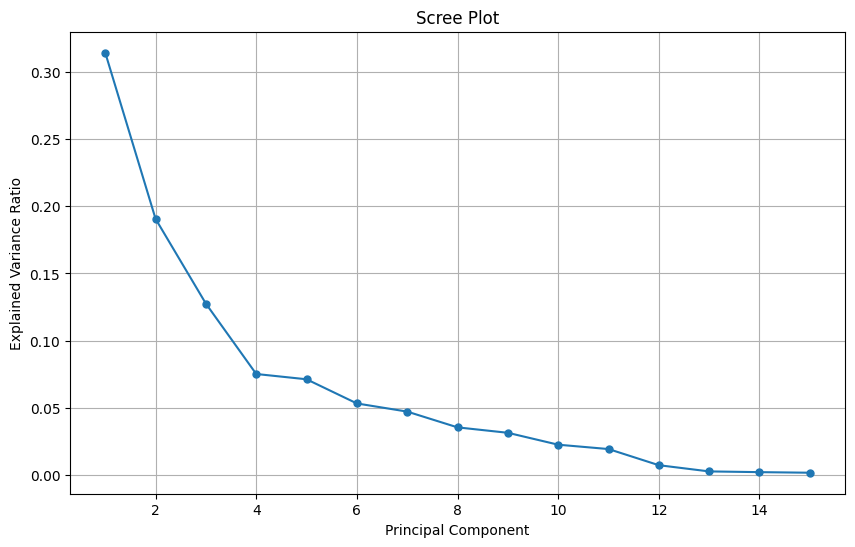

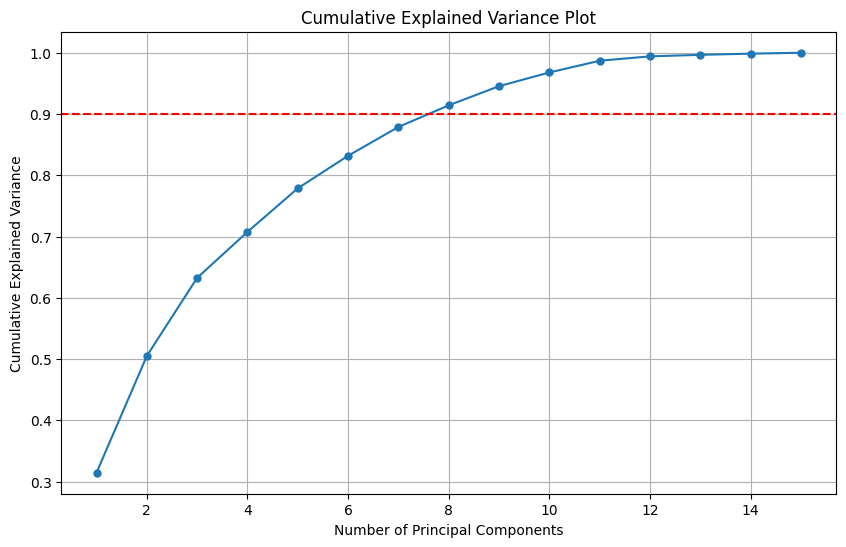

In [45]:
# Initialize PCA
pca = PCA()

# Fit PCA on the standardized data
pca.fit(scaled_df)

# Transform the data
df_pca = pca.transform(scaled_df)

# Plot Scree Plot
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', markersize=5)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Plot Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 'o-', markersize=5)
plt.axhline(y=0.90, color='r', linestyle='--')  # Example: 90% variance threshold
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()